In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr

#Creating red colormap
colors = plt.cm.Reds(np.linspace(0, 1, 256))
colors[0,:]=(1.0, 1.0, 1.0, 1.0)
Red = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

In [3]:
ds = xr.open_mfdataset('stateHR.nc')
tr = xr.open_mfdataset('tracerHR.nc')
print(ds)
print(tr)


<xarray.Dataset>
Dimensions:  (T: 721, X: 2560, Xp1: 2561, Y: 1, Yp1: 2, Z: 480, Zl: 480)
Coordinates:
  * Xp1      (Xp1) float64 7.105e-15 28.12 56.24 ... 7.496e+04 7.499e+04
  * Y        (Y) float64 10.0
  * Z        (Z) float64 -1.649 -4.948 -8.247 ... -2.472e+03 -2.483e+03
  * X        (X) float64 14.06 42.18 70.3 ... 7.491e+04 7.494e+04 7.498e+04
  * Yp1      (Yp1) float64 0.0 20.0
  * Zl       (Zl) float64 0.0 -3.299 -6.597 ... -2.456e+03 -2.467e+03 -2.478e+03
  * T        (T) float64 5.184e+06 5.184e+06 5.184e+06 ... 5.227e+06 5.227e+06
Data variables:
    iter     (T) int32 dask.array<shape=(721,), chunksize=(721,)>
    U        (T, Z, Y, Xp1) float32 dask.array<shape=(721, 480, 1, 2561), chunksize=(721, 480, 1, 2561)>
    V        (T, Z, Yp1, X) float32 dask.array<shape=(721, 480, 2, 2560), chunksize=(721, 480, 2, 2560)>
    Temp     (T, Z, Y, X) float32 dask.array<shape=(721, 480, 1, 2560), chunksize=(721, 480, 1, 2560)>
    S        (T, Z, Y, X) float32 dask.array<shape=(721

In [37]:
xq=ds['X']
zl=ds['Zl']
tracer = np.squeeze(tr.tracer)
salt = np.squeeze(ds.S)
temp = np.squeeze(ds.Temp)
u = np.squeeze(ds.U)
v = np.squeeze(ds.V[:,:,0,:])
w = np.squeeze(ds.W)
i=10 #time index
traceri=np.array(tracer[i,:,:])
traceri[traceri==0]=np.nan;

salti=np.array(salt[i,:,:]); 
mask=salti; mask[mask>0]=np.nan; mask[mask==0]=1.0

salti=np.array(salt[i,:,:]); 
salti[salti==0]=np.nan


(0, 70)

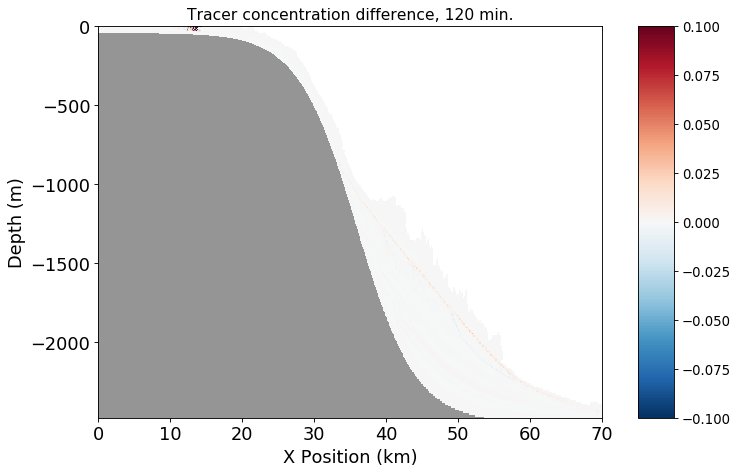

In [5]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
quad1 = quad0
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

i=0; j=120;
traceri=np.array(tracer[i,:,:]); traceri[traceri==0]=np.nan;
tracerj=np.array(tracer[j,:,:]); tracerj[tracerj==0]=np.nan;
#quad1 = ax1.pcolormesh(xq/1000,zl,tracerj-traceri,cmap=Red,vmin=-0.1,vmax=.1,shading='goaround')
quad1 = ax1.pcolormesh(xq/1000,zl,tracerj-traceri,cmap='RdBu_r',vmin=-0.1,vmax=.1,shading='goaround')
cb1 = fig.colorbar(quad1,ax2)
ax1.set_title('Tracer concentration difference, %2.f min.' %(j-i), fontsize=14)
ax1.set_xlim(0,70)

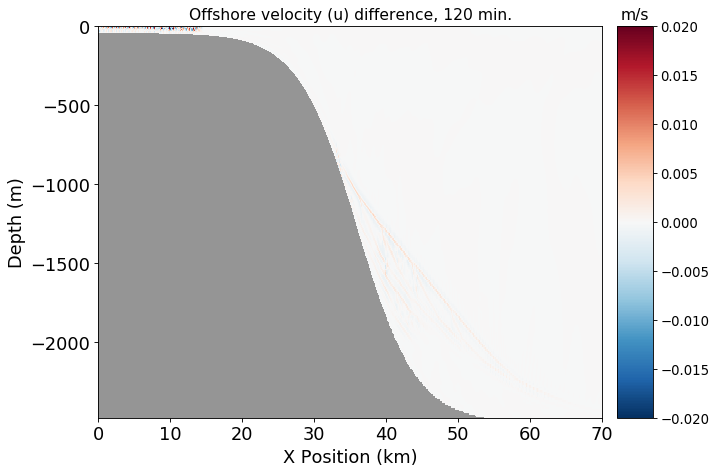

In [72]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=12);

i=0; j=120;
ui=np.array(u[i,:,0:2560]); ui[ui==0]=np.nan;
uj=np.array(u[j,:,0:2560]); uj[uj==0]=np.nan;
    
quad1 = ax1.pcolormesh(xq/1000,zl,uj-ui,cmap='RdBu_r',vmin=-0.02,vmax=0.02,shading='goaround')
cb1 = fig.colorbar(quad1,ax2)
ax1.set_title('Offshore velocity (u) difference, %2.f min.' %(j-i), fontsize=14)
ax2.set_title('m/s', fontsize=14)
ax1.set_xlim(0,70)
plt.savefig('index%.3d'%i)

/work2/eay/mitgcm_videos/gif2D


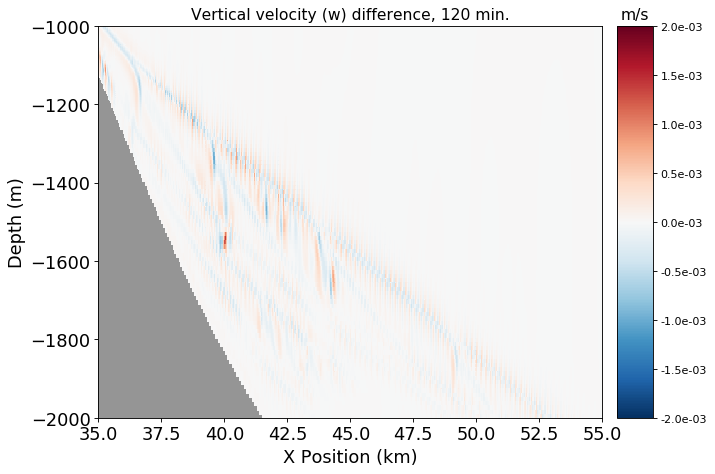

In [73]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.87, 0.1, 0.05, 0.7])
ax1.invert_yaxis

quad0= ax1.pcolormesh(xq/1000,zl,mask,cmap='Greys',vmin=0,vmax=2.)
ax1.set_xlabel('X Position (km)',fontsize=16); ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); ax2.tick_params(labelsize=10);

i=0; j=120;
wi=np.array(w[i,:,0:2560]); wi[wi==0]=np.nan;
wj=np.array(w[j,:,0:2560]); wj[wj==0]=np.nan;
quad1 = ax1.pcolormesh(xq/1000,zl,wj*1000-wi*1000,cmap='RdBu_r',vmin=-2,vmax=2,shading='goaround')
cb1 = fig.colorbar(quad1,ax2,format='%.1fe-03')
ax1.set_xlim(35,55)
ax1.set_ylim(-2000,-1000)
ax1.set_title('Vertical velocity (w) difference, %2.f min.' %(j-i), fontsize=14)
ax2.set_title('m/s', fontsize=14)
plt.savefig('index%.3d'%i)